# Lab2. Regression Model for a Financial Dataset
## Part 1. Stock Price Prediction with Python

In this notebook, you will build a simple linear regression model to predict the closing AAPL stock price. The lab objectives are:
* Load data into a Pandas dataframe
* Use Matplotlib to visualize data
* Use Scikit-Learn to build a regression model

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

plt.rc('figure', figsize = (12, 8.0))

Everything you'll need to build a regression model to predict the closing price of AAPL stock.
The only features you'll use as input into the model are the previous day's closing price and a three day trend value.
The trend value can only take on two values, either -1 or +1. If the AAPL stock price has increased over any two of the previous three days then the trend will be +1. Otherwise, the trend value will be -1.


Pull the dataset from the file "data-appl_regression.csv" into Pandas Dataframe as the object df. And remove rows that contains Null values.

In [2]:
df = pd.read_csv('data-appl_regression.csv')
df.dropna(inplace = True)

Check that the object df containing the query output is a Pandas Dataframe.
View the first five rows of the query's output.

In [3]:
df.head()

,date,close,day_prev_close,trend_3_day
0,2009-06-04,20.5343,20.1357,-1
1,2009-06-05,20.6671,20.5343,-1
2,2009-06-08,20.5500,20.6671,1
3,2009-06-09,20.3886,20.5500,1
4,2009-06-10,20.0357,20.3886,-1


## Visualize data

The simplest plot you can make is to show the closing stock price as a time series. Pandas DataFrames have built in plotting funtionality based on Matplotlib. 

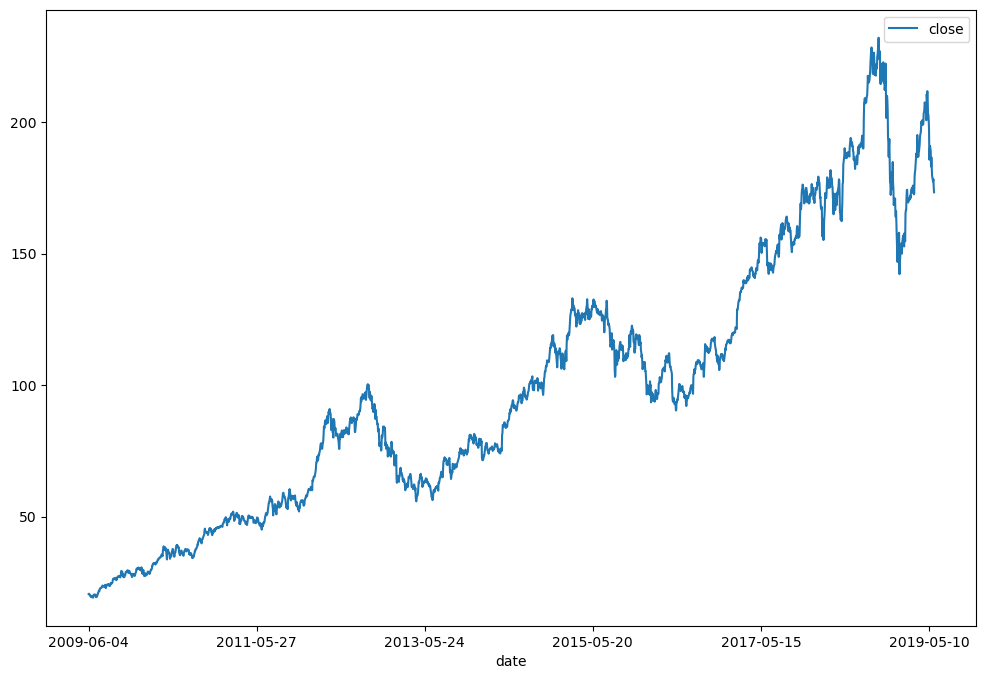

In [7]:
df.plot(x = 'date', y = 'close')

You can also embed the `trend_3_day` variable into the time series above. 

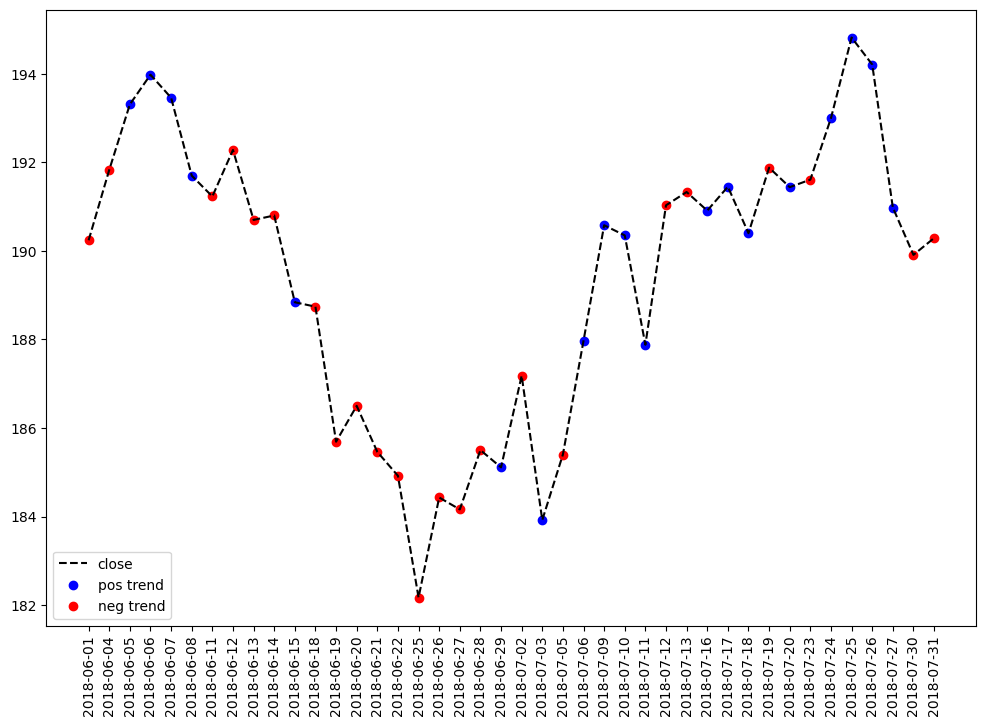

In [9]:
start_date = '2018-06-01'
end_date = '2018-07-31'

plt.plot(
    'date', 'close', 'k--',
    data = (
        df.loc[pd.to_datetime(df.date).between(start_date, end_date)]
    )
)

plt.scatter(
    'date', 'close', color='b', label='pos trend', 
    data = (
        df.loc[df.trend_3_day == 1 & pd.to_datetime(df.date).between(start_date, end_date)]
    )
)

plt.scatter(
    'date', 'close', color='r', label='neg trend',
    data = (
        df.loc[(df.trend_3_day == -1) & pd.to_datetime(df.date).between(start_date, end_date)]
    )
)

plt.legend()
plt.xticks(rotation = 90);

In [11]:
# Shape of dataset
df.shape

(2516, 4)

## Build a Regression Model in Scikit-Learn

In this section you'll train a linear regression model to predict AAPL closing prices when given the previous day's closing price `day_prev_close` and the three day trend `trend_3_day`. 
A training set and test set are created by sequentially splitting the data after 2000 rows. 

In [13]:
features = ['day_prev_close', 'trend_3_day']
target = 'close'

X_train, X_test = df.loc[:2000, features], df.loc[2000:, features]
y_train, y_test = df.loc[:2000, target], df.loc[2000:, target]

In [15]:
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept = False)

In [17]:
# Train the model using the training set
regr.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [19]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [21]:
# The root mean squared error
print('Mean squared error: {0:.2f}'.format(mean_squared_error(y_test, y_pred)))

print('Root mean squared error v1: {0:.2f}'.format(root_mean_squared_error(y_test, y_pred)))

print('Root mean squared error v2: {0:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Explained variance score: 1 is perfect prediction
print('R2 score: {0:.2f}'.format(r2_score(y_test, y_pred)))

Mean squared error: 8.92
Root mean squared error v1: 2.99
Root mean squared error v2: 2.99
R2 score: 0.98


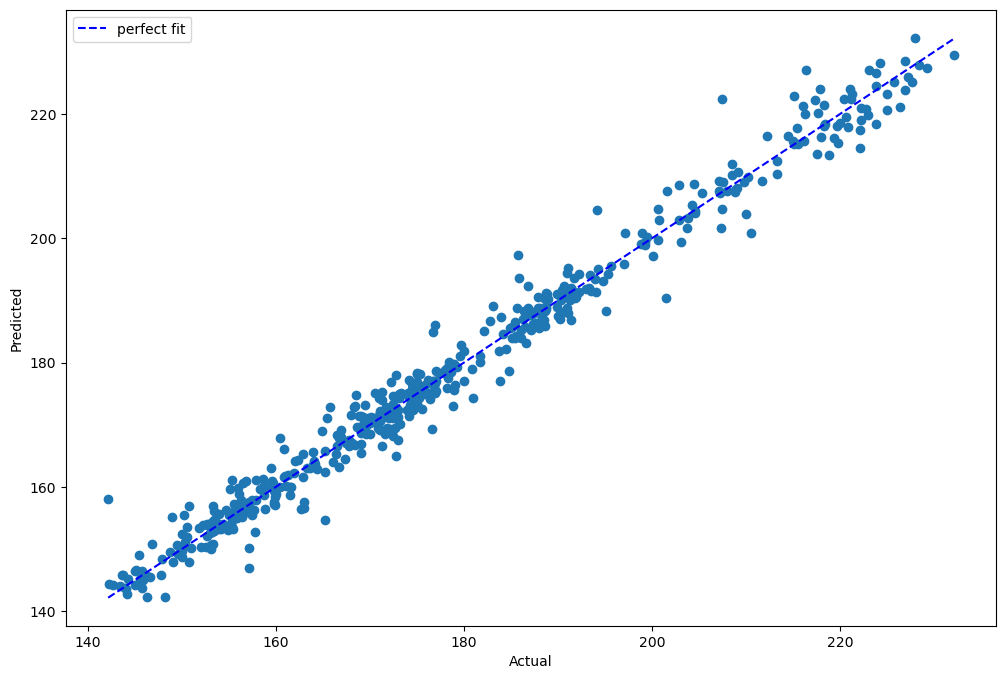

In [23]:
# Plot the predictions against actual values
plt.scatter(y_test, y_pred)
#plt.plot([140, 240], [140, 240], 'b--', label = 'perfect fit')
plt.plot ([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b--', label = 'perfect fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

The model's predictions are more or less in line with the truth. However, the utility of the model depends on the business context (i.e. you won't be making any money with this model). It's fair to question whether the variable `trend_3_day` even adds to the performance of the model:

In [25]:
print('RMSE: {0:.2f}'.format(root_mean_squared_error(y_test, X_test.day_prev_close)))

RMSE: 2.98


Indeed, the RMSE is actually lower if we simply use the previous day's closing value as a prediction.

## Part 2. Multiple Regression with Statsmodels and Seaborn

In [27]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

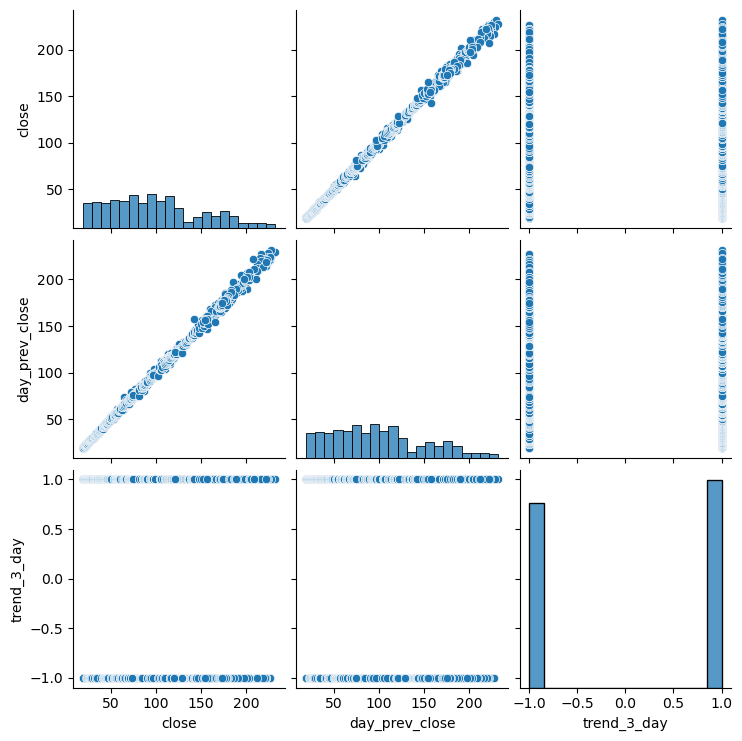

In [29]:
# Create a pairplot of the data
sns.pairplot(df)

In [31]:
# Define the OLS formula
ols_formula = 'close ~ day_prev_close + trend_3_day'

# Create an OLS model
REGR = ols(formula = ols_formula, data = df)

# Fit the model
model = REGR.fit()

# Save the results summary
model_summary = model.summary()
# Display the model results

print(model_summary)

# Evaluation metircs
#R2 score
print(model.rsquared)

#p-values
print(model.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.028e+06
Date:                Fri, 21 Feb 2025   Prob (F-statistic):               0.00
Time:                        07:24:49   Log-Likelihood:                -5012.6
No. Observations:                2516   AIC:                         1.003e+04
Df Residuals:                    2513   BIC:                         1.005e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1228      0.077      1.

### Model assumption: Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

Plot 1: Histogram of the residuals
Plot 2: Q-Q plot of the residuals

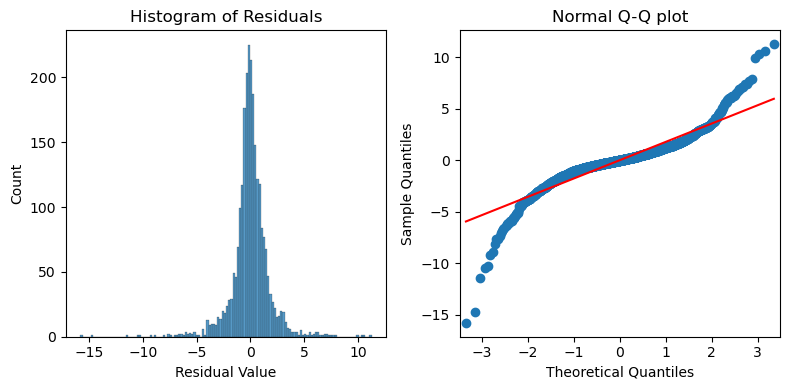

In [33]:
# Calculate the residuals
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals
sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal Q-Q plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance
plt.tight_layout()

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

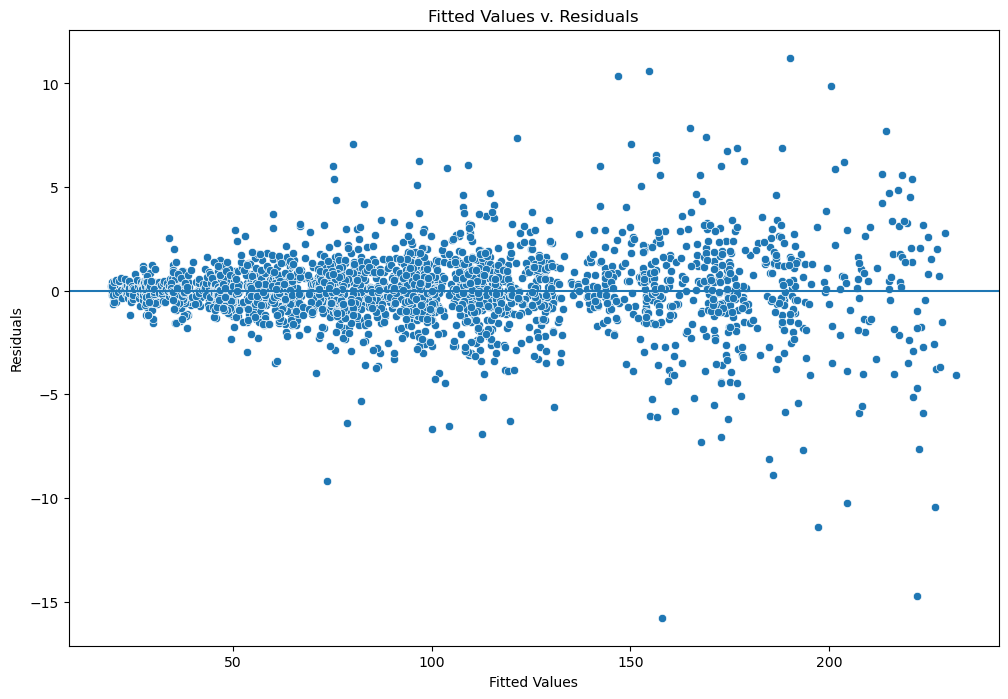

In [35]:
# Create a scatterplot with the fitted values from the model and the residuals
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x-axis label
fig.set_xlabel("Fitted Values")

# Set the y-axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0
fig.axhline(0)